In [1]:
import requests as r
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}

url = 'https://scholar.google.com/citations?user=8QxiFAwAAAAJ&hl=en'

all_results = '&cstart=0&pagesize=100'
url = url + all_results
response = r.post(url, headers=headers)

In [2]:
from bs4 import BeautifulSoup as Soup
soup = Soup(response.text,"lxml")

In [3]:
mydivs = soup.findAll('tr',class_="gsc_a_tr")

In [4]:
all_articles = []
for div in mydivs:
    article_title = div.findAll('a', class_="gsc_a_at")[0].text
    authors = div.findAll('div', class_="gs_gray")[0].text
    venue = div.findAll('div', class_="gs_gray")[1].text
    articlesCiting = div.findAll(class_="gsc_a_ac")[0]['href']
    citations = div.findAll(class_="gsc_a_ac")[0].text
    year = div.findAll(class_="gsc_a_h")[0].text
    
    all_articles.append({
        'article_title':article_title,
        'authors':authors,
        'venue':venue,
        'articlesCiting':articlesCiting,
        'citations':citations,
        'year':year
    })

In [5]:
import pandas as pd
df = pd.DataFrame(all_articles)

In [6]:
citation_count = df[df.citations != ''].citations.astype(int).sum()

In [7]:
#OUTPUT
citation_count

699

In [8]:
def parse_venue(cell):
    import re
    testspans = [x.span() for x in re.finditer(r' [0-9]',cell)]
    testspans2 = [x.span() for x in re.finditer(r'\, [0-9]',cell)]
    if len(testspans) == 0 and len(testspans2) == 0:
        return cell
    else:
        if testspans[0][0] <= testspans2[0][0]:
            testspan = testspans[0]
        else:
            testspan = testspans2[0]
        new_venue = cell[:testspan[0]]
        return new_venue
df['parsed_venue'] = df.venue.map(parse_venue)

In [9]:
top_publication_venues = df[df.parsed_venue != ''].parsed_venue.value_counts()[:10]

In [10]:
#OUTPUT
top_publication_venues

International Conference on Artificial Intelligence in Education             9
Educational Data Mining                                                      9
Adaptive Educational Technologies for Literacy Instruction                   6
FLAIRS Conference                                                            4
Proceedings of the                                                           4
International Journal of Artificial Intelligence in Education                3
Discourse Processes                                                          2
International Educational Data Mining Society                                2
Arizona State University                                                     2
Proceedings of the Seventh International Learning Analytics & Knowledge …    2
Name: parsed_venue, dtype: int64

In [11]:
title_text = ''
for title in df.article_title:
    title_text = title_text.lower() + ' ' + title

In [12]:
dashes = title_text.count('-') / df.article_title.count()

In [13]:
#OUTPUT
dashes

0.26000000000000001

In [14]:
questionmarks = title_text.count('?') / df.article_title.count()

In [15]:
#OUTPUT
questionmarks

0.080000000000000002

In [16]:
semicolons = title_text.count(':') / df.article_title.count()

In [17]:
#OUTPUT
semicolons

0.41999999999999998

In [18]:
import string
for punct in string.punctuation:
    title_text = title_text.replace(punct,'')

In [19]:
list_titles = title_text.split(' ')

In [20]:
from nltk.corpus import stopwords

In [21]:
stopwords = stopwords.words("english")
stopwords.append('')
stopwords.append(' ')

In [22]:
list_titles = [x for x in list_titles if x not in stopwords]

In [23]:
text = ' '.join(list_titles)

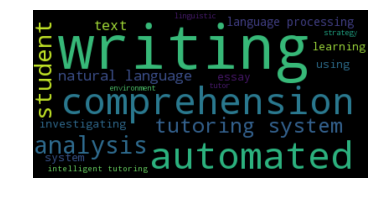

In [24]:
%matplotlib inline
from os import path
from wordcloud import WordCloud

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(min_font_size=9).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
#OUTPUT

In [25]:
def parse_authors(cell):
    if ',' in cell:
        authors = cell.split(', ')
    else:
        authors = [cell]
    return authors
df['parsed_authors'] = df.authors.map(parse_authors)

In [26]:
top_collaborators = pd.Series([st for row in df.parsed_authors for st in row])

In [28]:
#OUTPUT
top_collaborators.value_counts()[0:][:10]

DS McNamara    72
LK Allen       60
EL Snow        26
SA Crossley    19
ME Jacovina    15
L Allen        14
RD Roscoe      14
LK Varner      13
GT Jackson     12
...             9
dtype: int64

In [29]:
unique_collaborators = top_collaborators.value_counts().count()

In [30]:
#OUTPUT
unique_collaborators

87

In [31]:
temp2 = df[df.year != ''].copy()

In [32]:
temp = temp2.copy()

In [33]:
temp.year = temp.year.astype(int)

In [34]:
temp = pd.DataFrame(temp.year.value_counts())

In [35]:
temp['year2'] = temp.index

In [36]:
temp.rename(columns={'year':'count','year2':'year'},inplace=True)

In [37]:
temp.reset_index(inplace=True,drop=True)

In [38]:
temp = temp.sort_values('year',ascending=True)

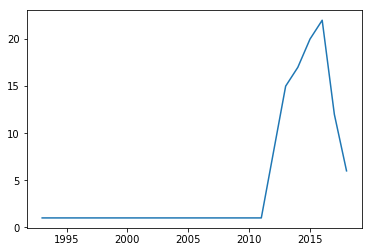

In [39]:
plt.plot(temp['year'],temp['count'])
#Articles Published Over Time
#OUTPUT

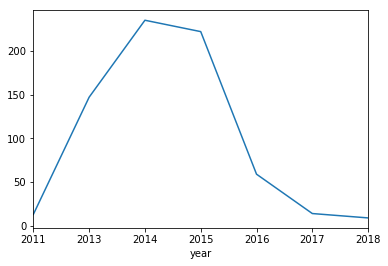

In [40]:
temp3 = temp2[temp2.citations != ''].copy()
temp3['citations'] = temp3.citations.astype(int)
temp3.groupby('year').sum()['citations'].plot()
#Citations Received on Articles Published Over Time
#OUTPUT